# 📚 Importing Libraries 📚

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

colors=['#33DAFF']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor



from sklearn.metrics import r2_score,mean_squared_error

import warnings
warnings.filterwarnings('ignore')


# ⏳ Loading the dataset ⏳</span>



In [3]:
df = pd.read_csv('/content/drive/MyDrive/IMDb Movies India.csv', encoding='latin-1')

# 🧠 Understanding of data 🧠

In [4]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


# 🧹 Data Cleaning 🧹

In [6]:
def missing_value_percentage(dataframe):

  missing_values=dataframe.isnull().sum()
  percent_missing_value=((missing_values/df.shape[0])*100).round(2)

  missing_data=pd.DataFrame({'missing values':missing_values,'Percentage of missing values':percent_missing_value })
  missing_data['Percentage of missing values']=missing_data['Percentage of missing values'].astype(str)+' %'

  return missing_data

In [7]:
missing_value_percentage(df)

,missing values,Percentage of missing values
Name,0,0.0 %
Year,528,3.4 %
Duration,8269,53.32 %
Genre,1877,12.1 %
Rating,7590,48.94 %
Votes,7589,48.93 %
Director,525,3.39 %
Actor 1,1617,10.43 %
Actor 2,2384,15.37 %
Actor 3,3144,20.27 %


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [9]:
#Checking if there are any typos

for col in df.select_dtypes(include = "object"):
    print("Name of Column:",col)
    print(df[col].unique())
    print('\n', '-'*60, '\n')

Name of Column: Name
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']

 ------------------------------------------------------------ 

Name of Column: Year
[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)'

In [10]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Handling the null values
df.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes','Director','Actor 1','Actor 2','Actor 3'], inplace=True)

#Extracting only the text part from the Name column
df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+)')

#Replacing the brackets from year column as observed above and converted data type of column to int
df['Year'] = df['Year'].str.replace('\(|\)', '').astype('int')

# Convert 'Duration' to numeric and replacing the min, while keeping only numerical part and converting dtype of column to int
df['Duration']=df['Duration'].str.split(' ').str.get(0).astype('int')

# Convert 'Votes' to numeric and replace the , to keep only numerical part and converting dtype of column to int
df['Votes']=df['Votes'].str.replace(',','').astype('int')

# Splitting the genre by , to keep only unique genres and replacing the null values with mode
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)



In [12]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [13]:
#checking duplicate values by Name and Year
duplicate = df.groupby(['Name', 'Year']).filter(lambda x: len(x) > 1)
duplicate

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Musical,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [14]:
# Dropping the duplicated values by Name
df = df.drop_duplicates(subset=['Name'], keep=False)

In [15]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
10,An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
30,Park Avenue,2005,116,Drama,7.1,1002,Aparna Sen,Shabana Azmi,Konkona Sen Sharma,Rahul Bose
32,th August,1993,168,Drama,5.6,15,Vicky Ranawat,Ronit Roy,Tisca Chopra,Shakti Kapoor
...,...,...,...,...,...,...,...,...,...,...
15478,Zindagi Tere Naam,2012,120,Romance,4.4,33,Ashu Trikha,Mithun Chakraborty,Ranjeeta Kaur,Priyanka Mehta
15479,Zindagi Tumse,2019,120,Family,6.0,13,Tariq Bhat,Sadhana Singh,Guddi Maruti,Rajesh Puri
15482,Zindagi Zindabad,2000,140,Drama,5.7,7,Sumitra Bhave,Sunil Sukthankar,Mita Vashisht,Milind Gunaji
15488,Zoo,2018,100,Drama,5.7,78,Shlok Sharma,Shashank Arora,Prince Daniel,Shatakshi Gupta


In [16]:
missing_value_percentage(df)

,missing values,Percentage of missing values
Name,0,0.0 %
Year,0,0.0 %
Duration,0,0.0 %
Genre,0,0.0 %
Rating,0,0.0 %
Votes,0,0.0 %
Director,0,0.0 %
Actor 1,0,0.0 %
Actor 2,0,0.0 %
Actor 3,0,0.0 %


In [17]:
df.reset_index(drop=True,inplace=True)

In [18]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
2,Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
3,Park Avenue,2005,116,Drama,7.1,1002,Aparna Sen,Shabana Azmi,Konkona Sen Sharma,Rahul Bose
4,th August,1993,168,Drama,5.6,15,Vicky Ranawat,Ronit Roy,Tisca Chopra,Shakti Kapoor
...,...,...,...,...,...,...,...,...,...,...
1523,Zindagi Tere Naam,2012,120,Romance,4.4,33,Ashu Trikha,Mithun Chakraborty,Ranjeeta Kaur,Priyanka Mehta
1524,Zindagi Tumse,2019,120,Family,6.0,13,Tariq Bhat,Sadhana Singh,Guddi Maruti,Rajesh Puri
1525,Zindagi Zindabad,2000,140,Drama,5.7,7,Sumitra Bhave,Sunil Sukthankar,Mita Vashisht,Milind Gunaji
1526,Zoo,2018,100,Drama,5.7,78,Shlok Sharma,Shashank Arora,Prince Daniel,Shatakshi Gupta


In [19]:
df.dtypes

Name         object
Year          int64
Duration      int64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

# Insights
* **Every column had null values** except name column
* We also found that the following columns: **Name, Year, Duration, Genre, and Votes had typos that were corrected later**
* The null values in most of the columns were **dropped and for Genre, it was filled with the mode value**
* Later, we checked the duplicated values and **dropped them based on Name column**

# 📊 Data Visualization 📊

In [20]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
2,Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
3,Park Avenue,2005,116,Drama,7.1,1002,Aparna Sen,Shabana Azmi,Konkona Sen Sharma,Rahul Bose
4,th August,1993,168,Drama,5.6,15,Vicky Ranawat,Ronit Roy,Tisca Chopra,Shakti Kapoor


Text(0.5, 1.0, 'Count Plot for Years')

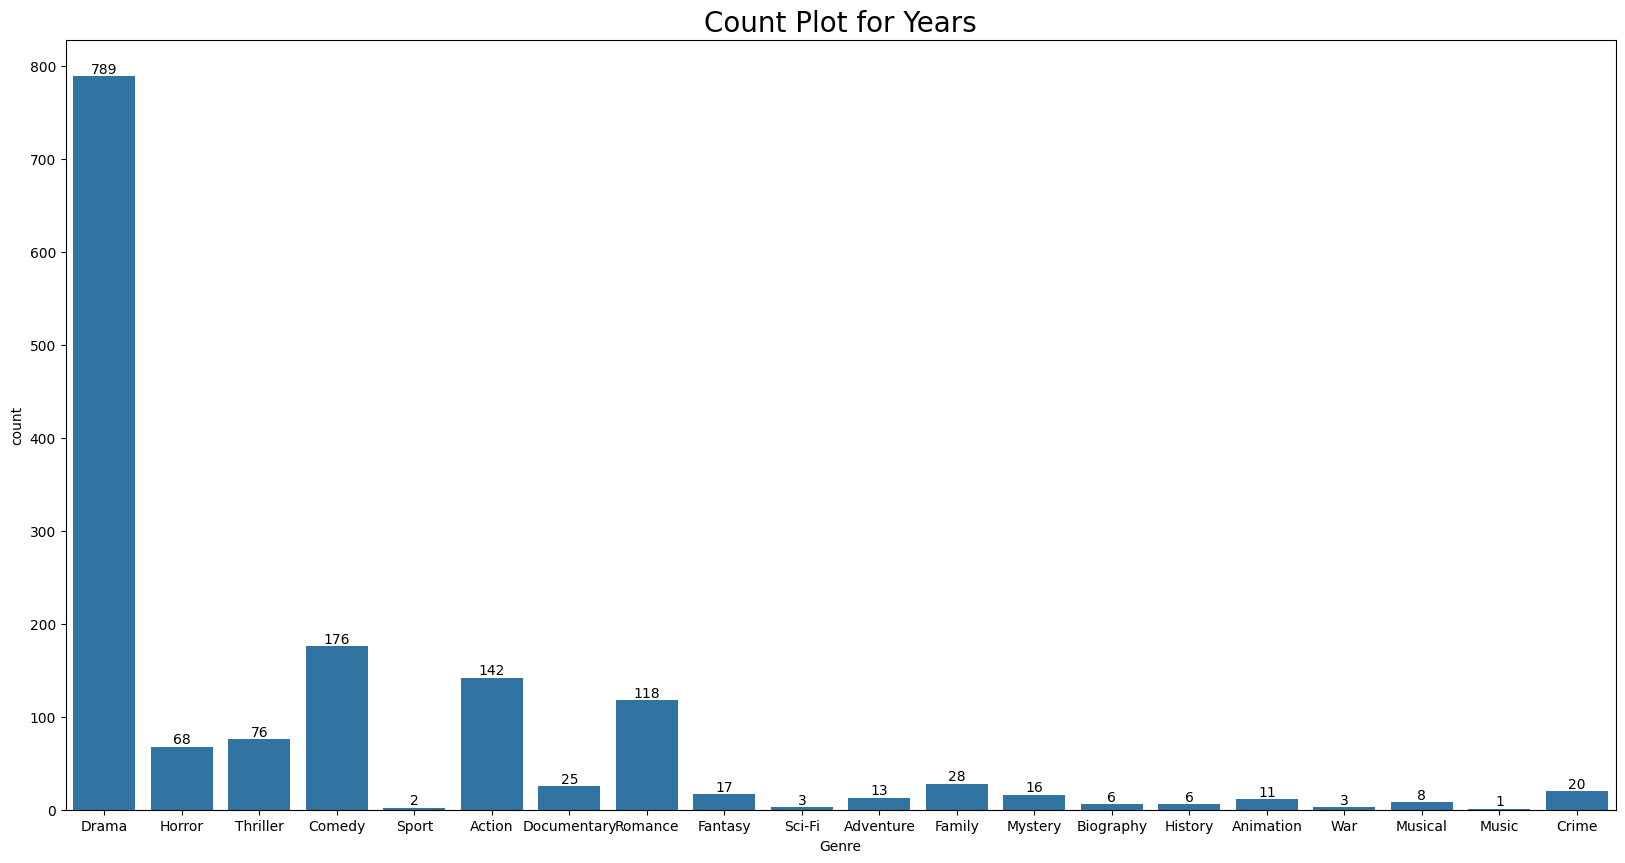

In [21]:
plt.figure(figsize=(20,10))
x=sns.countplot(x=df['Genre'])
for bars in x.containers:
  x.bar_label(bars)
plt.title('Count Plot for Years',fontsize=20)

Text(0, 0.5, 'Count')

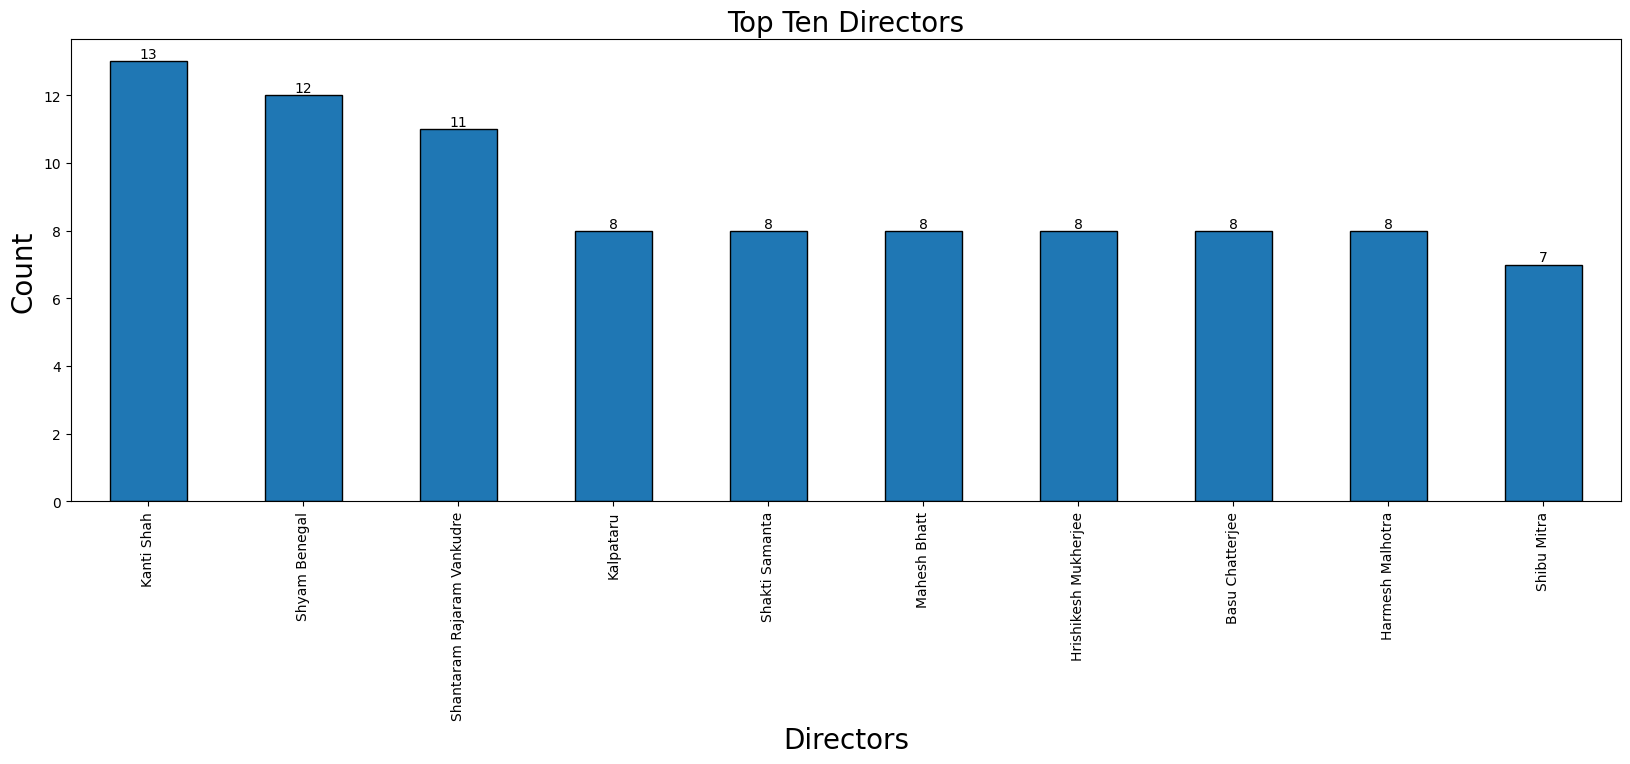

In [22]:
# Count plot of top ten directors
x=df['Director'].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
for bars in x.containers:
  x.bar_label(bars)
plt.title('Top Ten Directors',fontsize=20)
plt.xlabel('Directors',fontsize=20)
plt.ylabel('Count',fontsize=20)

Text(0, 0.5, 'Count')

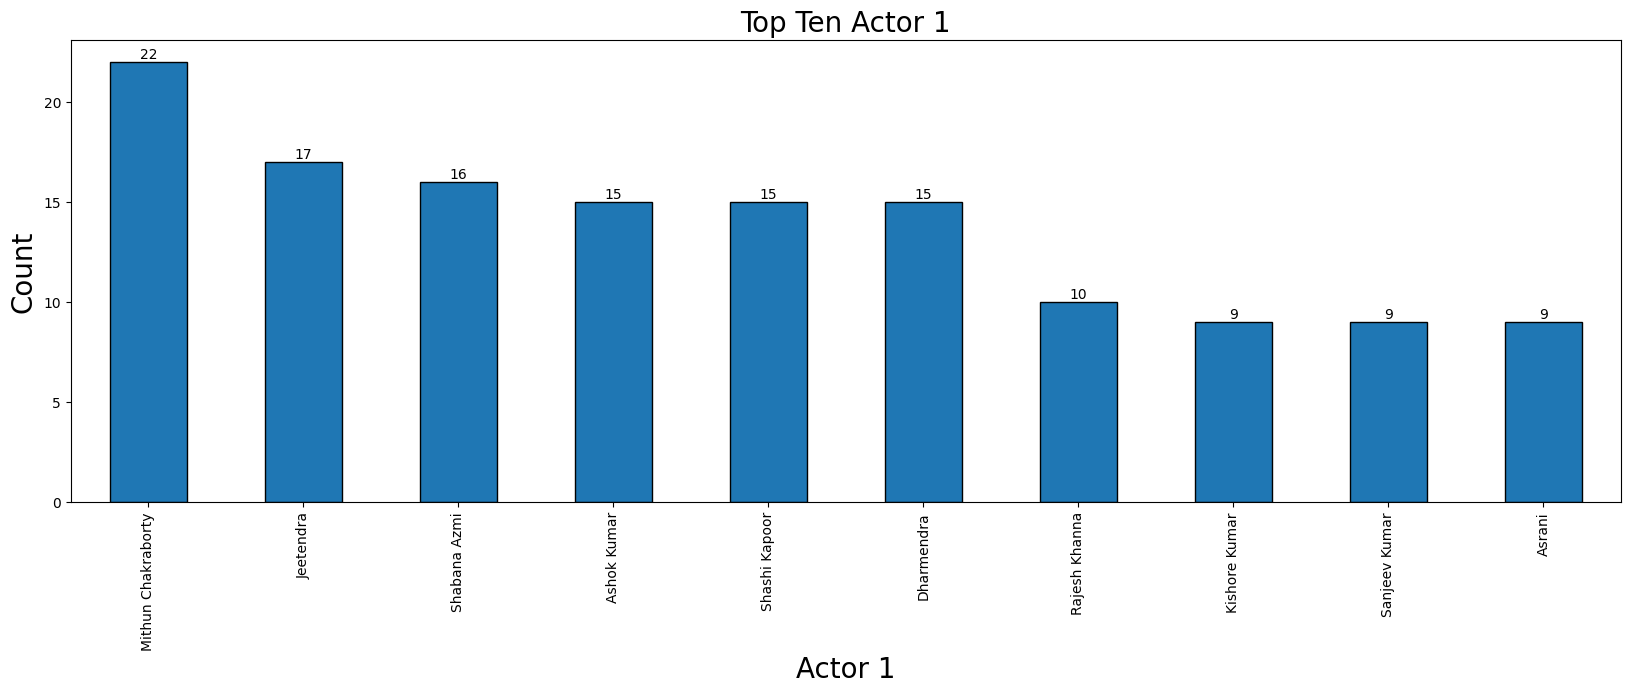

In [23]:
# Count plot of top ten Actor 1
x=df['Actor 1'].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
for bars in x.containers:
  x.bar_label(bars)
plt.title('Top Ten Actor 1',fontsize=20)
plt.xlabel('Actor 1',fontsize=20)
plt.ylabel('Count',fontsize=20)

Text(0, 0.5, 'Count')

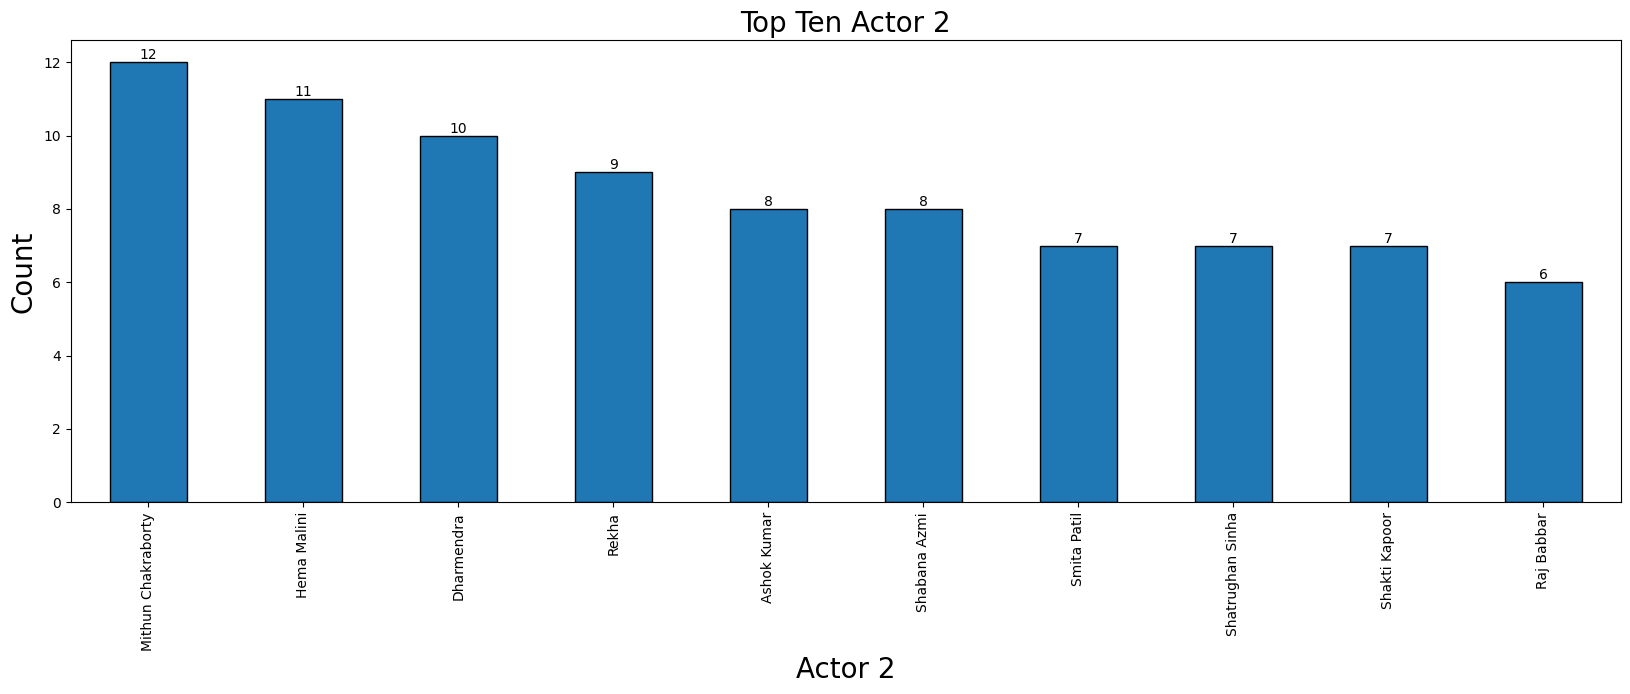

In [24]:
# Count plot of top ten Actor 2
x=df['Actor 2'].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
for bars in x.containers:
  x.bar_label(bars)
plt.title('Top Ten Actor 2',fontsize=20)
plt.xlabel('Actor 2',fontsize=20)
plt.ylabel('Count',fontsize=20)

Text(0, 0.5, 'Count')

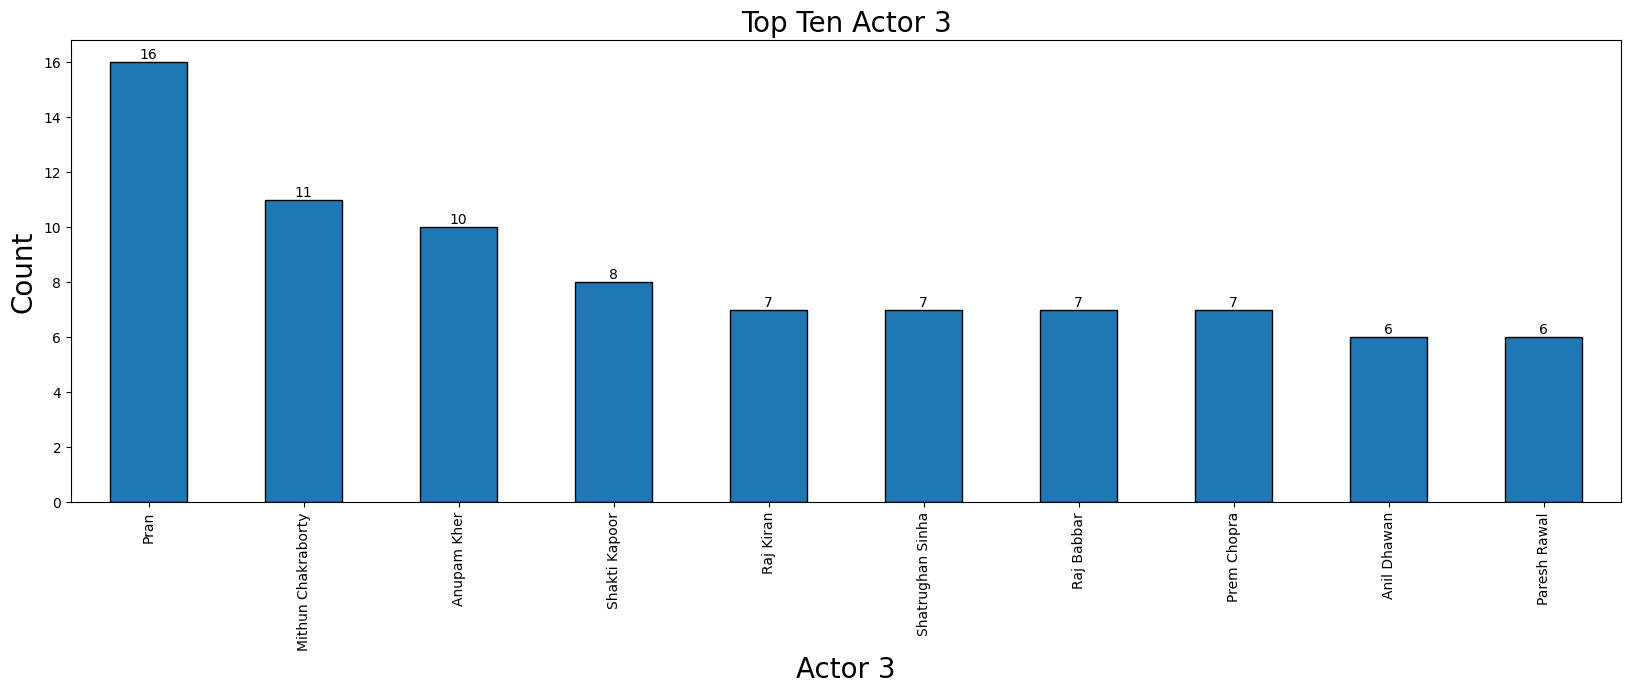

In [25]:
# Count plot of top ten Actor 3
x=df['Actor 3'].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
for bars in x.containers:
  x.bar_label(bars)
plt.title('Top Ten Actor 3',fontsize=20)
plt.xlabel('Actor 3',fontsize=20)
plt.ylabel('Count',fontsize=20)

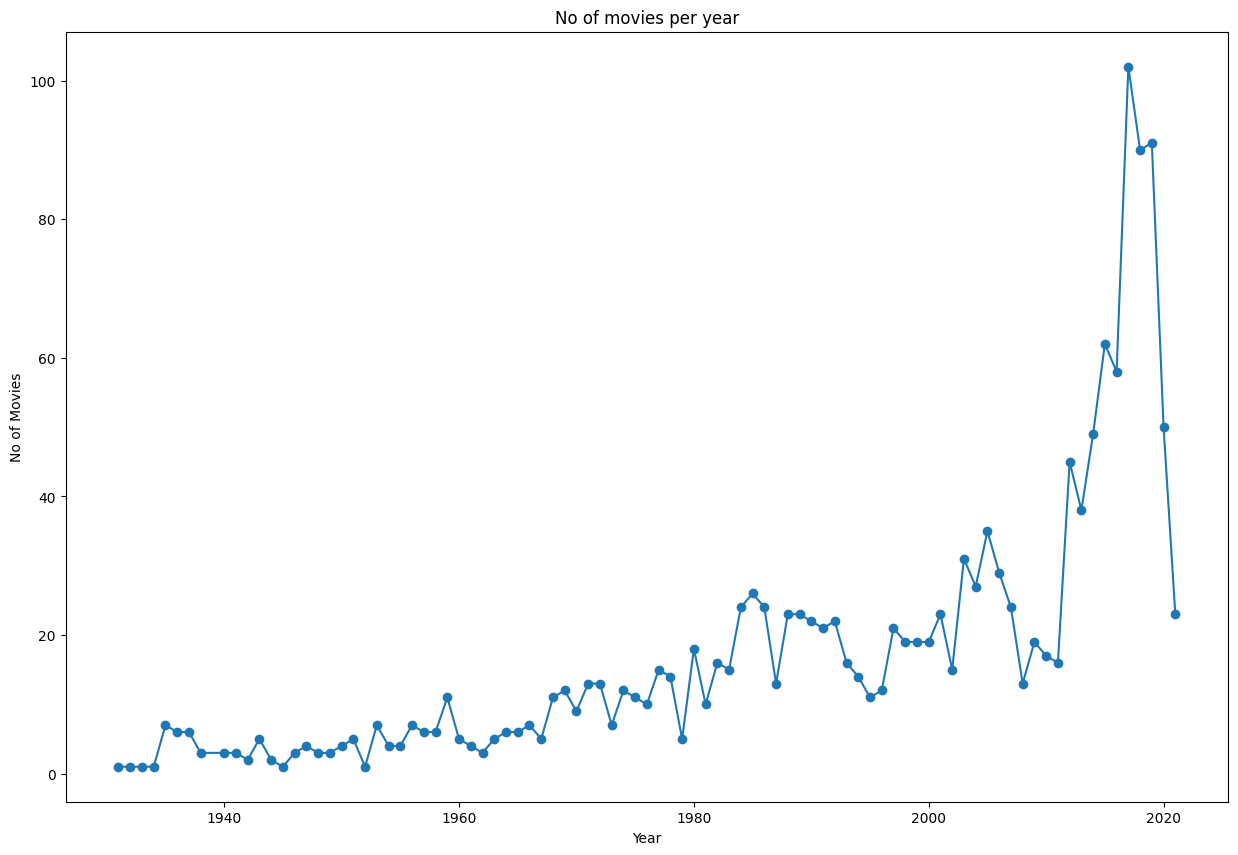

In [26]:
year_counts=df['Year'].value_counts().sort_index()

plt.figure(figsize=(15,10))

plt.plot(year_counts,marker='o')
plt.title('No of movies per year')
plt.xlabel('Year')
plt.ylabel('No of Movies')
plt.show()

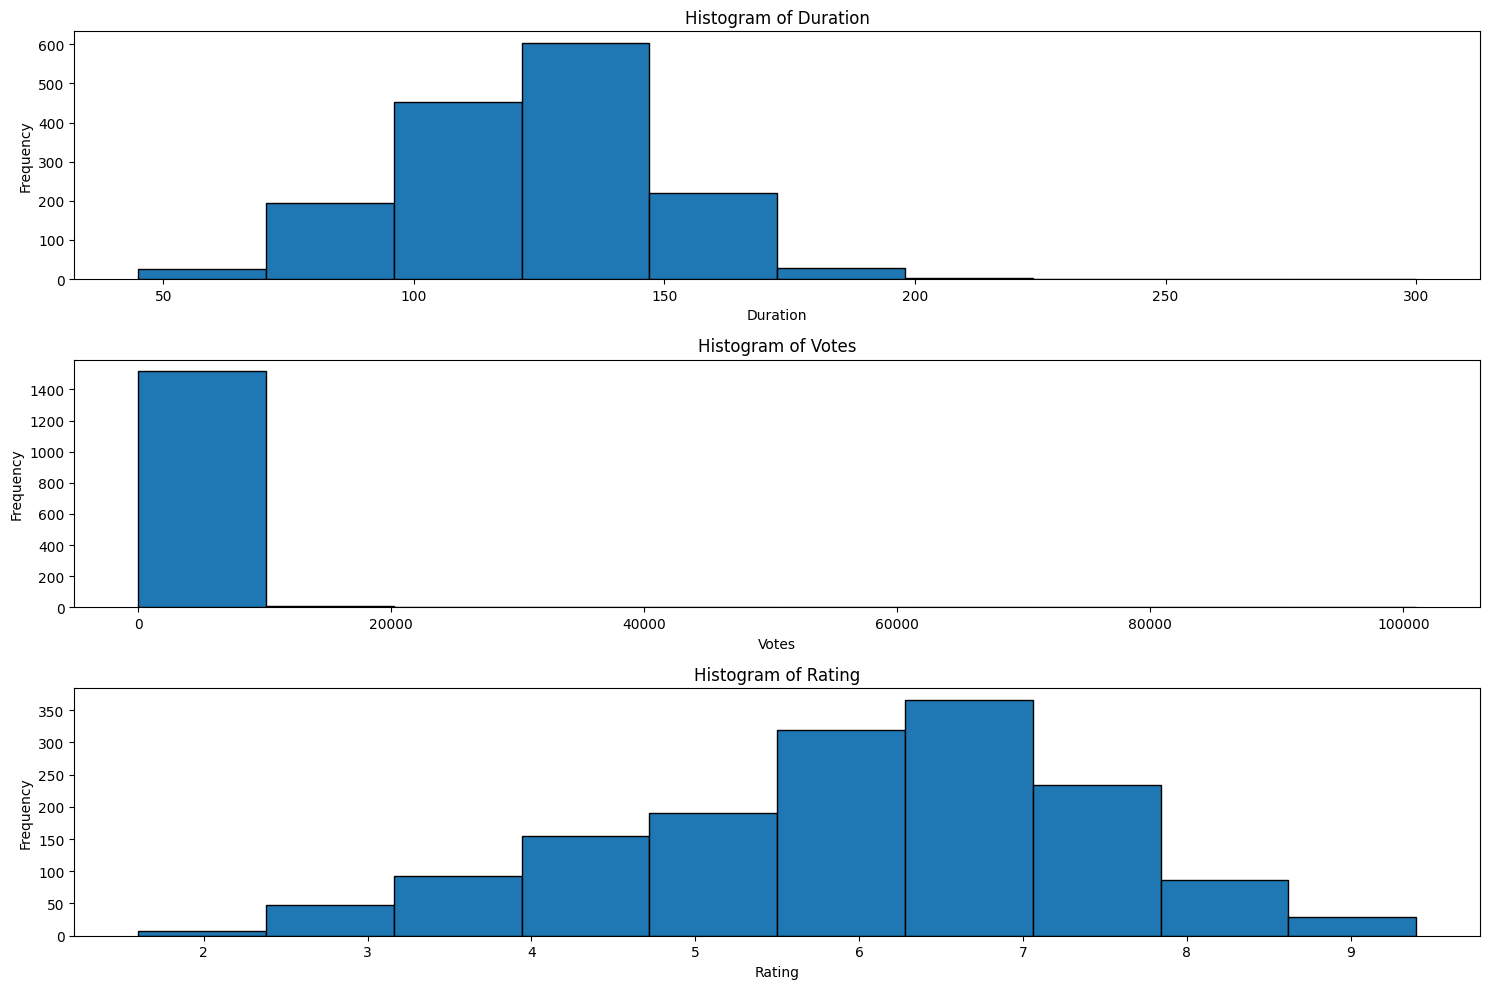

In [27]:
fig,ax=plt.subplots(nrows=3,ncols=1,figsize=(15,10))

ax[0].hist(df['Duration'],edgecolor='k')
ax[0].set_title('Histogram of Duration')
ax[0].set_xlabel('Duration')
ax[0].set_ylabel('Frequency')

ax[1].hist(df['Votes'],edgecolor='k')
ax[1].set_title('Histogram of Votes')
ax[1].set_xlabel('Votes')
ax[1].set_ylabel('Frequency')

ax[2].hist(df['Rating'],edgecolor='k')
ax[2].set_title('Histogram of Rating')
ax[2].set_xlabel('Rating')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

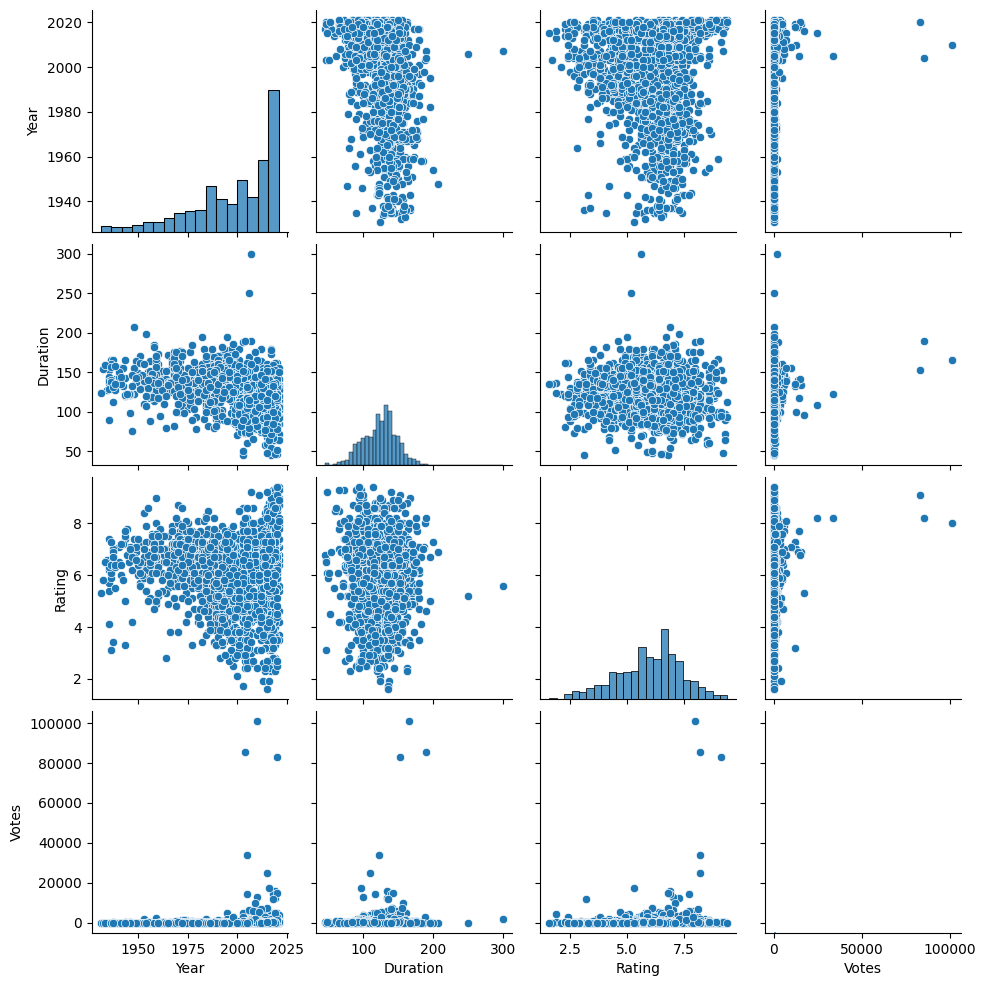

In [28]:
sns.pairplot(df)
plt.show()

<Axes: >

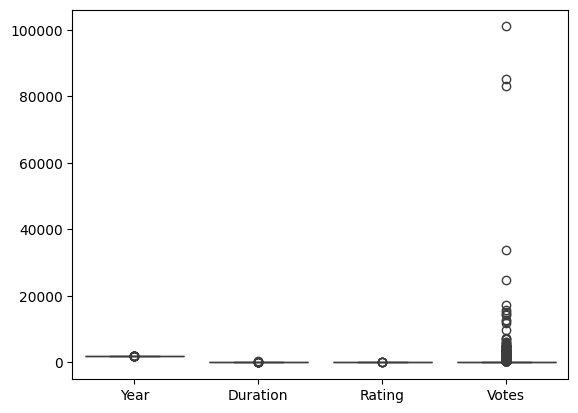

In [29]:
sns.boxplot(df)

We can observe that votes column has outlier present in it

<Axes: >

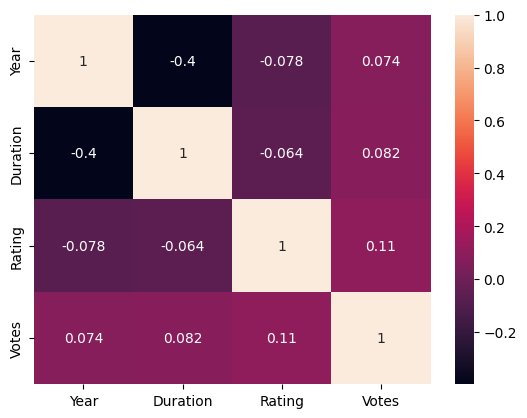

In [30]:
sns.heatmap(df.corr(),annot=True)

# ⚙️ Data Preprocessing ⚙️

In [31]:
df.drop('Name',axis=1,inplace=True)

---
### 1. Feature Engineering
---

In [32]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating


In [33]:
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
0,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.420152,7.000,6.850000,7.000000,7.000
1,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,6.420152,6.200,5.766667,5.100000,6.200
2,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,4.698529,5.900,5.900000,5.900000,5.900
3,2005,116,Drama,7.1,1002,Aparna Sen,Shabana Azmi,Konkona Sen Sharma,Rahul Bose,6.420152,6.525,6.900000,6.866667,5.700
4,1993,168,Drama,5.6,15,Vicky Ranawat,Ronit Roy,Tisca Chopra,Shakti Kapoor,6.420152,5.400,5.600000,6.400000,5.825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,2012,120,Romance,4.4,33,Ashu Trikha,Mithun Chakraborty,Ranjeeta Kaur,Priyanka Mehta,5.535593,4.400,5.231818,5.450000,4.400
1524,2019,120,Family,6.0,13,Tariq Bhat,Sadhana Singh,Guddi Maruti,Rajesh Puri,6.407143,6.000,6.000000,6.000000,6.000
1525,2000,140,Drama,5.7,7,Sumitra Bhave,Sunil Sukthankar,Mita Vashisht,Milind Gunaji,6.420152,5.700,5.700000,5.700000,6.000
1526,2018,100,Drama,5.7,78,Shlok Sharma,Shashank Arora,Prince Daniel,Shatakshi Gupta,6.420152,5.700,5.700000,5.700000,5.700


---
### 2. Splitting into training and testing
---

In [34]:
# Keeping the predictor and target variable

X = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [36]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1222, 8), (1222,), (306, 8), (306,))

---
### Scaling Data
---

In [37]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# 🎯 Model Building 🎯

In [38]:
models={
    "Linear Regression":LinearRegression(),
    'Ridge Regression':Ridge(random_state=69),
    'lasso Regression':Lasso(random_state=69),
    'Elastic Net Regression':ElasticNet(random_state=69),
    'Support Vector Regression':SVR(),
    'K-Nearest Neighbors (KNN) Regression':KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(random_state=69),
    "Random Forest Regressor": RandomForestRegressor(random_state=69)
}

In [39]:
def evaluate_model(X_train,X_test,y_train,y_test,models):
  score={}
  for i in range(len(models)):
    reg=list(models.values())[i]
    reg.fit(X_train,y_train)
    pred=reg.predict(X_test)
    score[list(models.keys())[i]]=r2_score(y_test,pred)

  return score

In [40]:
evaluate_model(X_train_scaled,X_test_scaled,y_train,y_test,models)

{'Linear Regression': 0.935188545523222,
 'Ridge Regression': 0.9351973451977923,
 'lasso Regression': 0.3577437965835297,
 'Elastic Net Regression': 0.7300450562117886,
 'Support Vector Regression': 0.921408587120107,
 'K-Nearest Neighbors (KNN) Regression': 0.9143882912363864,
 'Decision Tree Regressor': 0.9017976827482894,
 'Random Forest Regressor': 0.9438270663390288}

# **Result**

*   As we have very uncleaned Data. So proper Cleaning is must in this problem statement
*   We observed that Random Forest Regressor performs well among all of them with accuracy of 94.38 % indicating its robustness.

